## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df= pd.read_csv("Loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.shape

(614, 13)

## Data Visualisation

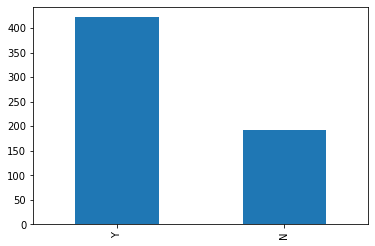

In [7]:
df['Loan_Status'].value_counts().plot.bar()
results_path = 'bar_target.png'
#print(results_path)
plt.savefig(results_path)

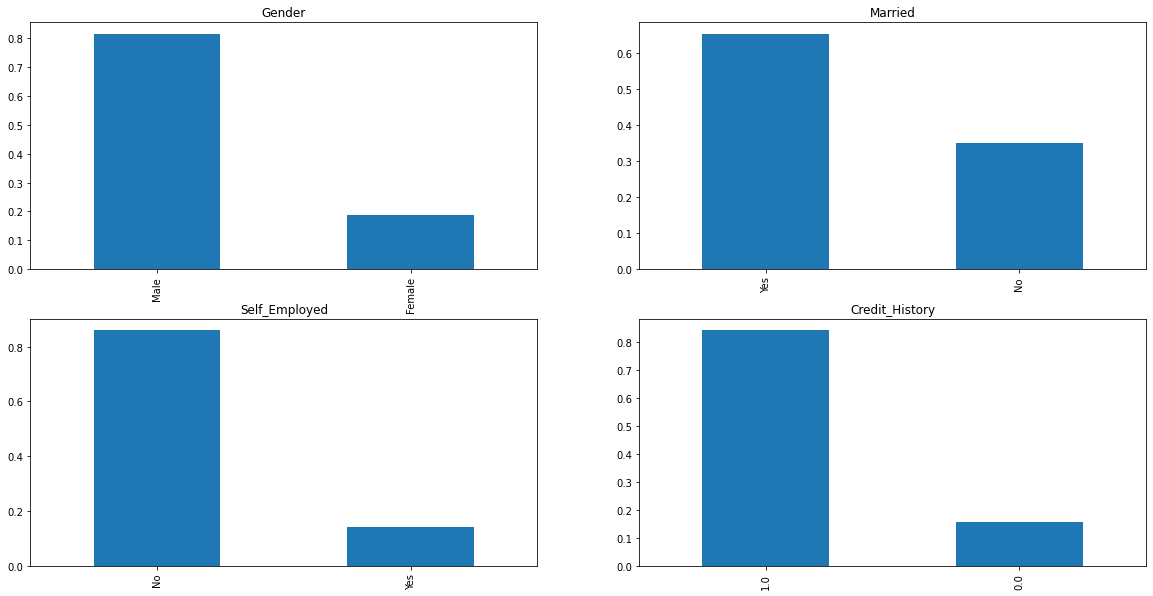

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")

plt.show()
results_path = 'bar.png'
#print(results_path)
plt.savefig(results_path)

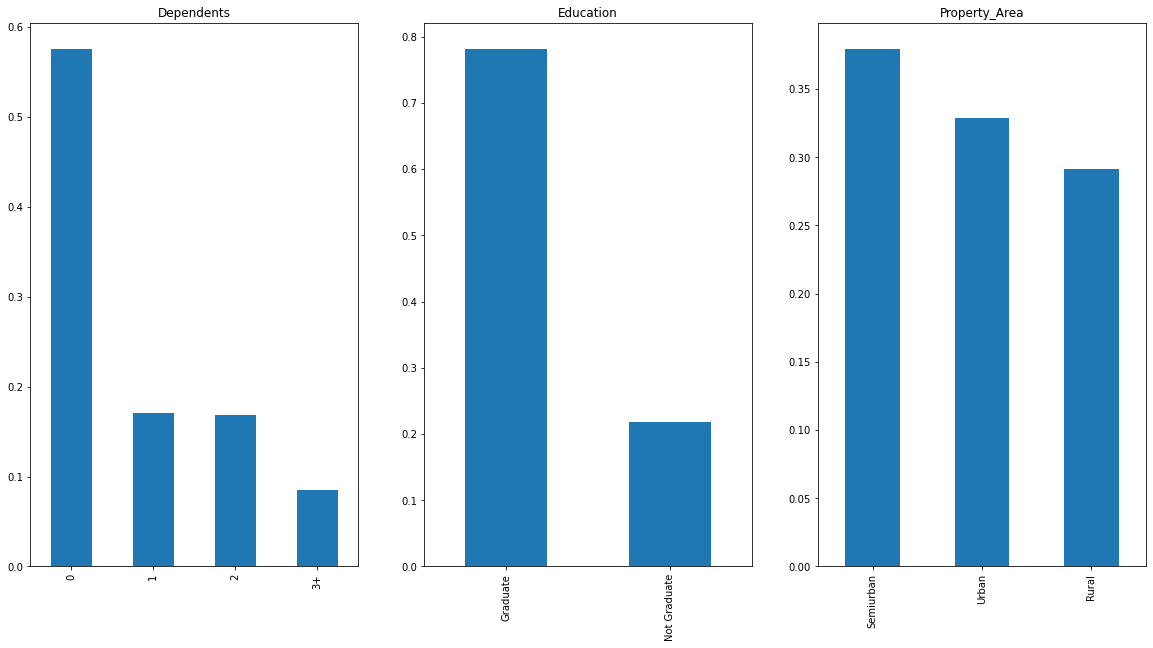

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure()
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Education")
plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Property_Area")
plt.show()
results_path = 'bar1.png'
#print(results_path)
plt.savefig(results_path)

In [10]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [11]:
df.corr(method = 'spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000


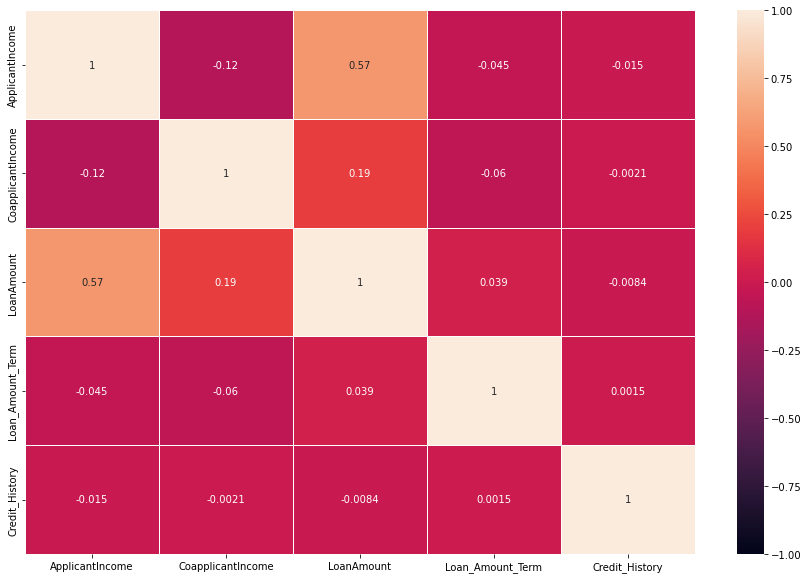

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')
results_path = 'correlation_matrix.png'
#print(results_path)
plt.savefig(results_path)

## Finding missing values

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df["LoanAmount_log"]=np.log(df['LoanAmount'])
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df["TotalIncome_log"]=np.log(df['Total_Income'])

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
TotalIncome_log      0
dtype: int64

In [16]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [17]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [18]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [19]:
for i in range(0,5):
    x[:,i]= LabelEncoder_x.fit_transform(x[:,i])
    x[:,7]=LabelEncoder_x.fit_transform(x[:,7])
x

array([[1, 0, 0, ..., 1.0, 4.857444178729353, 320],
       [1, 1, 1, ..., 1.0, 4.852030263919617, 333],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 42],
       ...,
       [1, 1, 1, ..., 1.0, 5.53338948872752, 436],
       [1, 1, 2, ..., 1.0, 5.231108616854587, 416],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 185]], dtype=object)

In [20]:
LabelEncoder_y = LabelEncoder()
y = LabelEncoder_y.fit_transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x = ss.fit_transform(x)

## Applying Random Forest Model for Prediction

In [22]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)
X_train2,X_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.3,random_state=0)
X_train3,X_test3,y_train3,y_test3 = train_test_split(x,y,test_size=0.4,random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train1, y_train1)

RandomForestClassifier()

In [24]:
from sklearn import metrics
y_pred1 = rf_clf1.predict(X_test1)
print("acc of random forest clf is",metrics.accuracy_score(y_pred1, y_test1))

acc of random forest clf is 0.7886178861788617


In [25]:
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X_train2, y_train2)

RandomForestClassifier()

In [26]:
y_pred2 = rf_clf2.predict(X_test2)
print("acc of random forest clf is",metrics.accuracy_score(y_pred2, y_test2))

acc of random forest clf is 0.7891891891891892


In [27]:
rf_clf3 = RandomForestClassifier()
rf_clf3.fit(X_train3, y_train3)

RandomForestClassifier()

In [28]:
y_pred3 = rf_clf3.predict(X_test3)
print("acc of random forest clf is",metrics.accuracy_score(y_pred3, y_test3))

acc of random forest clf is 0.8048780487804879


In [29]:
from sklearn.metrics import confusion_matrix
def conf_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

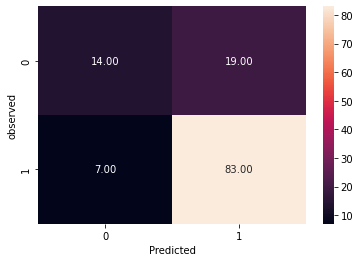

<Figure size 432x288 with 0 Axes>

In [30]:
conf_matrix(y_test1,y_pred1)
results_path = 'results_cm1.png'
#print(results_path)
plt.savefig(results_path)

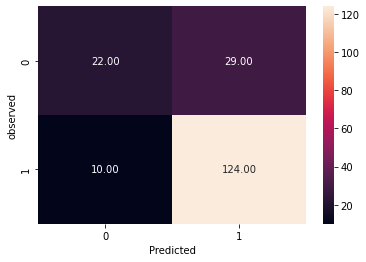

<Figure size 432x288 with 0 Axes>

In [31]:
conf_matrix(y_test2,y_pred2)
results_path = 'results_cm2.png'
#print(results_path)
plt.savefig(results_path)

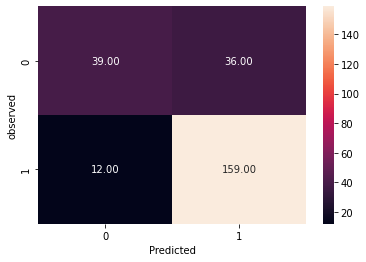

<Figure size 432x288 with 0 Axes>

In [32]:
conf_matrix(y_test3,y_pred3)
results_path = 'results_cm3.png'
#print(results_path)
plt.savefig(results_path)

In [ ]:
def calculate_metrics(confusion_matrix):
  
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = (2 * TP) / (2 * TP + FP + FN)
    fdr = FP / (FP + TP)
    fnr = FN / (TP + FN)
    npv = TN / (TN + FN)
    fpr = FP / (TN + FP)
    precision = TP / (TP + FP)
    mcc = ((TP * TN) - (FP * FN)) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    return sensitivity, specificity, accuracy, f1_score, fdr, fnr, npv, fpr, precision, mcc

confusion_matrix = metrics.confusion_matrix(y_test1, y_pred1)
sensitivity, specificity, accuracy, f1_score, fdr, fnr, npv, fpr, precision, mcc = calculate_metrics(confusion_matrix)

print("Sensitivity/Recall/True Positive Rate: {:.2

In [33]:
def calculate_metrics(confusion_matrix):
  
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = (2 * TP) / (2 * TP + FP + FN)
    fdr = FP / (FP + TP)
    fnr = FN / (TP + FN)
    npv = TN / (TN + FN)
    fpr = FP / (TN + FP)
    precision = TP / (TP + FP)
    mcc = ((TP * TN) - (FP * FN)) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    return sensitivity, specificity, accuracy, f1_score, fdr, fnr, npv, fpr, precision, mcc

confusion_matrix = metrics.confusion_matrix(y_test1, y_pred1)
sensitivity, specificity, accuracy, f1_score, fdr, fnr, npv, fpr, precision, mcc = calculate_metrics(confusion_matrix)

print("Sensitivity/Recall/True Positive Rate: {:.2f}".format(sensitivity))
print("Specificity/True Negative Rate: {:.2f}".format(specificity))
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1_score))
print("False Discovery Rate: {:.2f}".format(fdr))
print("False Negative Rate: {:.2f}".format(fnr))
print("Negative Predictive Value: {:.2f}".format(npv))
print("False Positive Rate: {:.2f}".format(fpr))
print("Precision/Positive Predictive Value: {:.2f}".format(precision))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))

Sensitivity/Recall/True Positive Rate: 0.92
Specificity/True Negative Rate: 0.42
Accuracy: 0.79
F1 Score: 0.86
False Discovery Rate: 0.19
False Negative Rate: 0.08
Negative Predictive Value: 0.67
False Positive Rate: 0.58
Precision/Positive Predictive Value: 0.81
Matthews Correlation Coefficient: 0.41


In [34]:
confusion_matrix = metrics.confusion_matrix(y_test2, y_pred2)
sensitivity, specificity, accuracy, f1_score, fdr, fnr, npv, fpr, precision, mcc = calculate_metrics(confusion_matrix)

print("Sensitivity/Recall/True Positive Rate: {:.2f}".format(sensitivity))
print("Specificity/True Negative Rate: {:.2f}".format(specificity))
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1_score))
print("False Discovery Rate: {:.2f}".format(fdr))
print("False Negative Rate: {:.2f}".format(fnr))
print("Negative Predictive Value: {:.2f}".format(npv))
print("False Positive Rate: {:.2f}".format(fpr))
print("Precision/Positive Predictive Value: {:.2f}".format(precision))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))

Sensitivity/Recall/True Positive Rate: 0.93
Specificity/True Negative Rate: 0.43
Accuracy: 0.79
F1 Score: 0.86
False Discovery Rate: 0.19
False Negative Rate: 0.07
Negative Predictive Value: 0.69
False Positive Rate: 0.57
Precision/Positive Predictive Value: 0.81
Matthews Correlation Coefficient: 0.42


In [35]:
confusion_matrix = metrics.confusion_matrix(y_test3, y_pred3)
sensitivity, specificity, accuracy, f1_score, fdr, fnr, npv, fpr, precision, mcc = calculate_metrics(confusion_matrix)

print("Sensitivity/Recall/True Positive Rate: {:.2f}".format(sensitivity))
print("Specificity/True Negative Rate: {:.2f}".format(specificity))
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1_score))
print("False Discovery Rate: {:.2f}".format(fdr))
print("False Negative Rate: {:.2f}".format(fnr))
print("Negative Predictive Value: {:.2f}".format(npv))
print("False Positive Rate: {:.2f}".format(fpr))
print("Precision/Positive Predictive Value: {:.2f}".format(precision))
print("Matthews Correlation Coefficient: {:.2f}".format(mcc))

Sensitivity/Recall/True Positive Rate: 0.93
Specificity/True Negative Rate: 0.52
Accuracy: 0.80
F1 Score: 0.87
False Discovery Rate: 0.18
False Negative Rate: 0.07
Negative Predictive Value: 0.76
False Positive Rate: 0.48
Precision/Positive Predictive Value: 0.82
Matthews Correlation Coefficient: 0.51


In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.6732323232323232


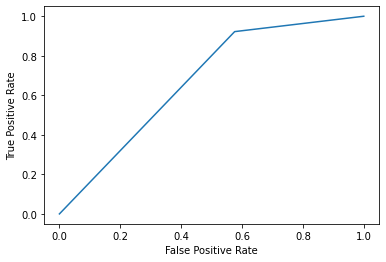

In [37]:
plot_roc_curve(y_test1, y_pred1)
print(f'model 1 AUC score: {roc_auc_score(y_test1, y_pred1)}')
results_path = 'roc1.png'
#print(results_path)
plt.savefig(results_path)

model 1 AUC score: 0.678372841673983


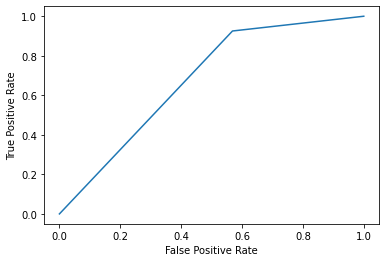

In [38]:
plot_roc_curve(y_test2, y_pred2)
print(f'model 1 AUC score: {roc_auc_score(y_test2, y_pred2)}')
results_path = 'roc2.png'
#print(results_path)
plt.savefig(results_path)

model 1 AUC score: 0.6732323232323232


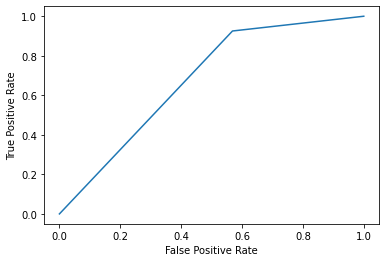

In [39]:
plot_roc_curve(y_test2, y_pred2)
print(f'model 1 AUC score: {roc_auc_score(y_test1, y_pred1)}')
results_path = 'roc3.png'
#print(results_path)
plt.savefig(results_path)

## Results

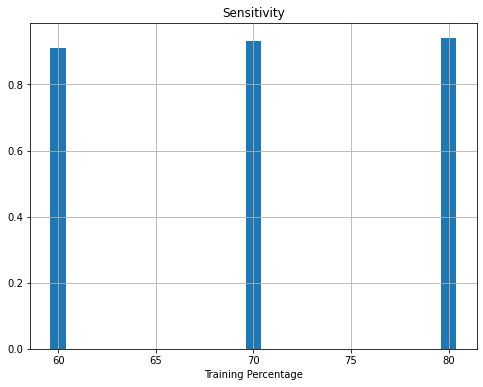

<Figure size 432x288 with 0 Axes>

In [40]:
training_percentages = [60, 70, 80]
sensitivity = [0.91,0.93,0.94]
specivity = [0.51,0.45,0.42]
accuracy = [0.79,0.79,0.80]
f1_score = [0.86,0.87,0.88]
FDR = [0.19,0.18,0.18]
FNR = [0.09,0.07,0.06]
NPV = [0.72,0.70,0.74]
FPR = [0.49,0.55,0.58]
Precision = [0.81,0.82,0.82]
MCC =[0.47,0.44,0.45]

# Plot evaluation measures
plt.figure(figsize=(8, 6))
plt.bar(training_percentages, sensitivity)
plt.title('Sensitivity')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results1.png'
#print(results_path)
plt.savefig(results_path)

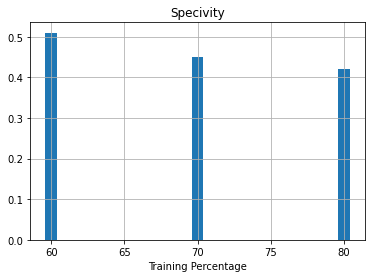

<Figure size 432x288 with 0 Axes>

In [41]:
plt.bar(training_percentages, specivity)
plt.title('Specivity')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results2.png'
#print(results_path)
plt.savefig(results_path)

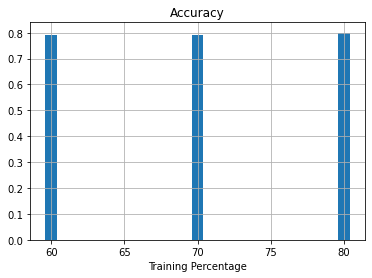

<Figure size 432x288 with 0 Axes>

In [42]:
plt.bar(training_percentages, accuracy)
plt.title('Accuracy')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results3.png'
#print(results_path)
plt.savefig(results_path)

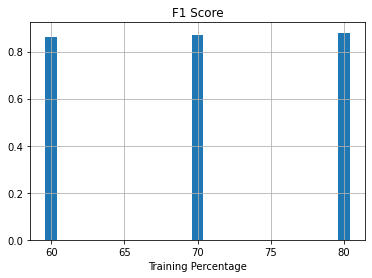

<Figure size 432x288 with 0 Axes>

In [43]:
plt.bar(training_percentages, f1_score)
plt.title('F1 Score')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results4.png'
#print(results_path)
plt.savefig(results_path)

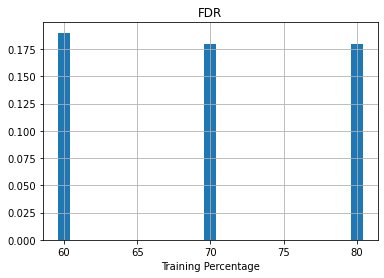

<Figure size 432x288 with 0 Axes>

In [44]:
plt.bar(training_percentages, FDR)
plt.title('FDR')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results5.png'
#print(results_path)
plt.savefig(results_path)

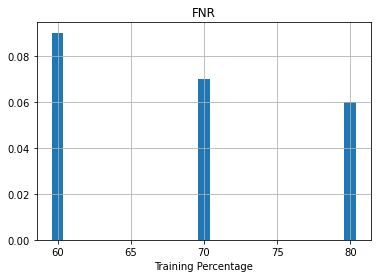

<Figure size 432x288 with 0 Axes>

In [45]:
plt.bar(training_percentages, FNR)
plt.title('FNR')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results6.png'
#print(results_path)
plt.savefig(results_path)

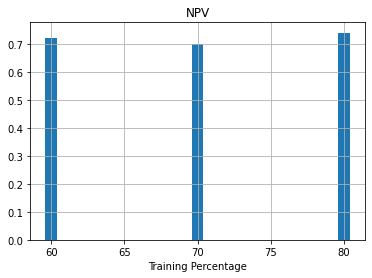

<Figure size 432x288 with 0 Axes>

In [46]:
plt.bar(training_percentages, NPV)
plt.title('NPV')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results7.png'
#print(results_path)
plt.savefig(results_path)

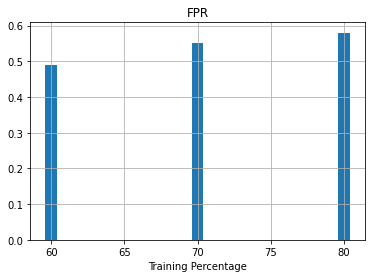

<Figure size 432x288 with 0 Axes>

In [47]:
plt.bar(training_percentages, FPR)
plt.title('FPR')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results8.png'
#print(results_path)
plt.savefig(results_path)

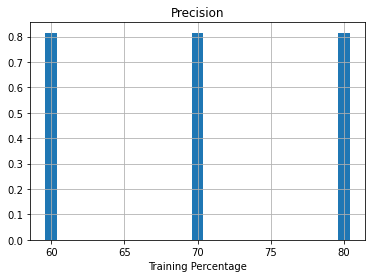

<Figure size 432x288 with 0 Axes>

In [48]:
plt.bar(training_percentages, precision)
plt.title('Precision')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results9.png'
#print(results_path)
plt.savefig(results_path)

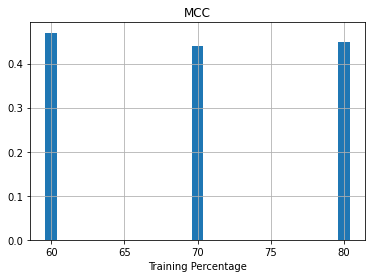

<Figure size 432x288 with 0 Axes>

In [49]:
plt.bar(training_percentages, MCC)
plt.title('MCC')
plt.xlabel('Training Percentage')
plt.grid(True)
plt.show()
results_path = 'results10.png'
#print(results_path)
plt.savefig(results_path)